In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Reading the dataset
#df = pd.read_parquet('/content/drive/MyDrive/Capstone/transactions_dataset.parquet',columns=['date_order','client_id','sales_net'])

# Creating a column with the month and year
#df['month_year'] = df['date_order'].dt.strftime('%m_%Y')

#Erasing 'refunds'
#erase = df.query('sales_net < 0')
#df = df.drop(erase.index)

#Creating the first groupby, counting how many transactions per month
#clients = df.groupby(['client_id','month_year']).agg({'sales_net':'count'})
#clients = clients.reset_index()

# If the value is bigger than 0 then 1, if not zero. This will help witht the mothly count of clients

#clients.loc[clients['sales_net']>0,'sales_net']=1

# Pivoting the table
#clients_end = clients.pivot(index='client_id',columns='month_year',values='sales_net')

#Ordering the columns in the new dataframe
#cols = cols = ['09_2017','10_2017','11_2017','12_2017','01_2018','02_2018','03_2018','04_2018','05_2018','06_2018','07_2018'
#,'08_2018','09_2018','10_2018','11_2018','12_2018','01_2019','02_2019','03_2019','04_2019','05_2019','06_2019','07_2019'
#,'08_2019','09_2019']
#clients_end = clients_end[cols]

# Exporting to CSV
#clients_end.to_csv('/content/drive/MyDrive/Capstone/client_buying_DB.csv',header=True)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/client_buying_DB.csv')
df

,client_id,09_2017,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,...,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019
0,1000078,1,0,1,0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
1,1000352,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1000380,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1000618,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,1000680,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170584,701328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
170585,742185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
170586,751654,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
170587,878141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
client_retention = pd.DataFrame(columns = ['month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12'])
for i in range(1, 13):
    j = 12 + i
    range = df.iloc[:, i:j]
    filter = range.iloc[:, 0]
    clients = range.loc[filter == 1]
    clients_total = clients.sum()
    base_clients = filter.sum()
    percentages = (clients_total / base_clients)
    percentages = percentages.to_list()
    client_retention = client_retention.append(pd.Series(percentages, index=client_retention.columns), ignore_index=True)

In [8]:
client_retention

,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,1.0,0.879108,0.850459,0.827680,0.818624,0.799809,0.811274,0.759019,0.749059,0.790929,0.794340,0.800462
1,1.0,0.748555,0.713830,0.705907,0.685171,0.699762,0.631750,0.624794,0.679850,0.685171,0.699435,0.617015
2,1.0,0.740690,0.725489,0.701963,0.715971,0.649682,0.640661,0.695153,0.696976,0.711065,0.629977,0.689603
3,1.0,0.754212,0.724786,0.737838,0.667519,0.656247,0.711053,0.713583,0.726565,0.645113,0.703589,0.679112
4,1.0,0.742422,0.750647,0.677892,0.665263,0.718784,0.721817,0.731607,0.652884,0.708260,0.685453,0.674070
5,1.0,0.772290,0.693258,0.680337,0.733842,0.735324,0.746620,0.663813,0.722859,0.697047,0.685665,0.663884
6,1.0,0.698138,0.675347,0.728867,0.730402,0.742022,0.659513,0.716295,0.691832,0.678513,0.657380,0.641560
7,1.0,0.724781,0.764092,0.764184,0.772427,0.694299,0.746051,0.724135,0.709002,0.690116,0.673152,0.695468
8,1.0,0.781772,0.775198,0.782828,0.702642,0.755649,0.731577,0.716022,0.694810,0.676426,0.699145,0.665952
9,1.0,0.766004,0.769142,0.677843,0.738106,0.710592,0.696533,0.673116,0.655686,0.679213,0.639271,0.620129


<ipython-input-9-dfe07a39203d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])


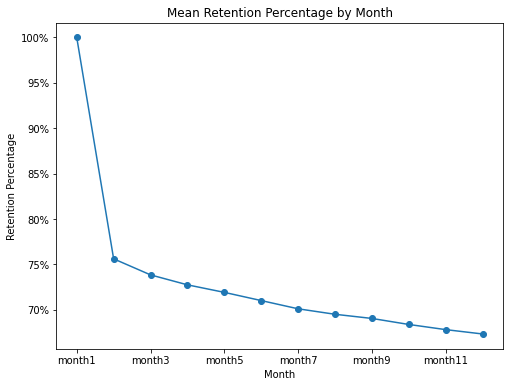

In [9]:
# calculate the mean of each column
mean_values = client_retention.mean()

# plot the mean values
plt.figure(figsize=(8,6))
mean_values.plot(kind='line', marker ='o')

# set plot title and axis labels
plt.title('Mean Retention Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Retention Percentage')
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
# display the plot
plt.show()

In [10]:
client_retention_2 = pd.DataFrame(columns = ['month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 
                                           'month11', 'month12','month13','month14','month15','month16','month17','month18','month19','month20',
                                           'month21','month22','month23','month24','month25'])


In [11]:
y=1
while y != 27 and y < df.shape[1]:
  df_range = df.iloc[:, y:]
  if df_range.shape[1] > 0:
    df_filter = df_range.iloc[:, 0]
    clients_2 = df_range.loc[df_filter == 1]
    clients_total_2 = clients_2.sum()
    base_clients_2 = df_filter.sum()
    percentages_2 = (clients_total_2 / base_clients_2)*100
    percentages_2 = percentages_2.to_list()
    client_retention_2.loc[y-1,:len(percentages_2)] = percentages_2
  y += 1


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [12]:
client_retention_2

,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,...,month16,month17,month18,month19,month20,month21,month22,month23,month24,month25
0,100.0,87.910792,85.045908,82.76805,81.862425,79.980934,81.127389,75.901861,74.905925,79.09287,...,74.853244,72.959209,71.712408,73.327982,70.342682,68.699513,72.003412,72.698309,73.473484,64.372084
1,100.0,74.855529,71.382998,70.590696,68.517114,69.976205,63.17496,62.479408,67.984991,68.517114,...,61.574667,59.890699,62.183929,58.449912,56.480925,61.11053,62.20877,63.337081,51.751955,NaN
2,100.0,74.06901,72.548862,70.196252,71.597094,64.96823,64.066061,69.515269,69.697579,71.106464,...,61.252312,63.570069,59.969436,57.875546,62.157162,63.44272,64.520497,53.033593,NaN,NaN
3,100.0,75.421161,72.478594,73.783776,66.751918,65.624653,71.105304,71.358279,72.656511,64.511287,...,65.181252,61.433893,59.177972,63.550817,64.609974,65.684421,54.253308,NaN,NaN,NaN
4,100.0,74.242193,75.064737,67.78924,66.526345,71.878419,72.18168,73.160701,65.288375,70.826006,...,61.902652,59.770131,64.014401,65.216368,66.066607,54.73932,NaN,NaN,NaN,NaN
5,100.0,77.22902,69.325774,68.033733,73.384236,73.532387,74.662032,66.381287,72.28593,69.704697,...,60.955284,65.302925,66.539409,67.22318,55.75578,NaN,NaN,NaN,NaN,NaN
6,100.0,69.813808,67.534656,72.886654,73.040228,74.202229,65.951345,71.629519,69.183202,67.851318,...,64.660234,65.804566,66.742321,55.047567,NaN,NaN,NaN,NaN,NaN,NaN
7,100.0,72.478122,76.40916,76.418388,77.242737,69.429877,74.605128,72.413528,70.900171,69.01155,...,68.740868,69.345288,58.336537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,78.177156,77.519814,78.282828,70.26418,75.56488,73.157731,71.602176,69.480963,67.64258,...,70.278166,58.853147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,76.600438,76.914223,67.784324,73.810633,71.059194,69.65333,67.311592,65.568649,67.921348,...,56.392162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
x = 0
while x != 26 and y < client_retention_2.shape[1]:
  df_range = df.iloc[:, x]
  if client_retention_2.shape[1]> 0:
    client_retention_2.iloc[:,x] = pd.to_numeric(client_retention_2.iloc[:,x], errors='coerce')
  x += 1

In [14]:
client_retention_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month1   25 non-null     object
 1   month2   24 non-null     object
 2   month3   23 non-null     object
 3   month4   22 non-null     object
 4   month5   21 non-null     object
 5   month6   20 non-null     object
 6   month7   19 non-null     object
 7   month8   18 non-null     object
 8   month9   17 non-null     object
 9   month10  16 non-null     object
 10  month11  15 non-null     object
 11  month12  14 non-null     object
 12  month13  13 non-null     object
 13  month14  12 non-null     object
 14  month15  11 non-null     object
 15  month16  10 non-null     object
 16  month17  9 non-null      object
 17  month18  8 non-null      object
 18  month19  7 non-null      object
 19  month20  6 non-null      object
 20  month21  5 non-null      object
 21  month22  4 non-null      object
 22  mont

Text(0.5, 1.0, 'Client Retention Sep 2017 to Sep 2019')

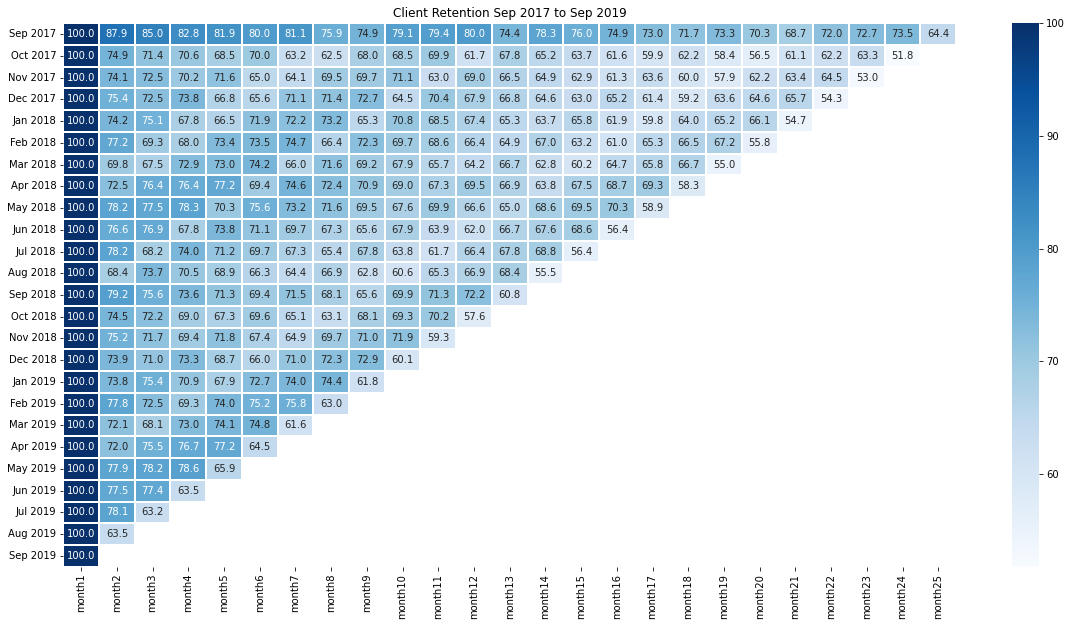

In [15]:
month_list = ["Sep 2017", 
            "Oct 2017", "Nov 2017", "Dec 2017", "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018", "Jul 2018", "Aug 2018", "Sep 2018", 
            "Oct 2018", "Nov 2018", "Dec 2018", "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019", "Jul 2019", "Aug 2019", "Sep 2019"]
plt.figure(figsize = (20,10))
sns.heatmap(data = client_retention_2.round(2).astype(float), annot = True, cmap = "Blues", fmt = ".1f", linewidths = 0.2, yticklabels = month_list)
plt.title("Client Retention Sep 2017 to Sep 2019")